In [4]:
import torch
import torch.nn as nn
import math
class eca_block(nn.Module):
    def __init__(self, channel, b=1, gamma=2):
        super(eca_block, self).__init__()
        kernel_size = int(abs((math.log(channel, 2) + b) / gamma))
        kernel_size = kernel_size if kernel_size % 2 else kernel_size + 1
        
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.conv = nn.Conv1d(1, 1, kernel_size=kernel_size, padding=(kernel_size - 1) // 2, bias=False) 
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.avg_pool(x)
        y = self.conv(y.squeeze(-1).transpose(-1, -2)).transpose(-1, -2).unsqueeze(-1)
        y = self.sigmoid(y)
        return x * y.expand_as(x)


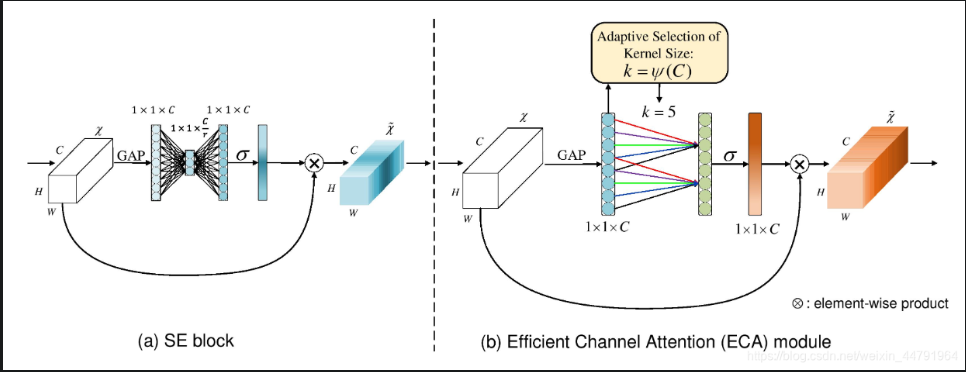